In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/banklist.csv")
display(df.head())

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [3]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')


In [5]:
num_states = df['ST'].nunique()
print(f"\nNumber of unique states: {num_states}")


Number of unique states: 44


In [6]:
states_list = df['ST'].unique()
print("\nList of states:")
print(states_list)


List of states:
['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


In [7]:
top_states = df['ST'].value_counts().head(5)
print("\nTop 5 states with most failed banks:")
print(top_states)


Top 5 states with most failed banks:
ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


In [8]:
top_acquirers = df['Acquiring Institution'].value_counts().head(5)
print("\nTop 5 acquiring institutions:")
print(top_acquirers)



Top 5 acquiring institutions:
Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


In [9]:
state_bank_tx = df[df['Acquiring Institution'] == 'State Bank of Texas']
count_total = len(state_bank_tx)
count_tx = len(state_bank_tx[state_bank_tx['ST'] == 'TX'])
print(f"\nNumber of banks acquired by State Bank of Texas: {count_total}")
print(f"Number of those in Texas: {count_tx}")


Number of banks acquired by State Bank of Texas: 3
Number of those in Texas: 1


In [10]:
most_common_ca_city = df[df['ST'] == 'CA']['City'].value_counts().idxmax()
print(f"\nMost common city in California for failed banks: {most_common_ca_city}")


Most common city in California for failed banks: Los Angeles


historical auto sales

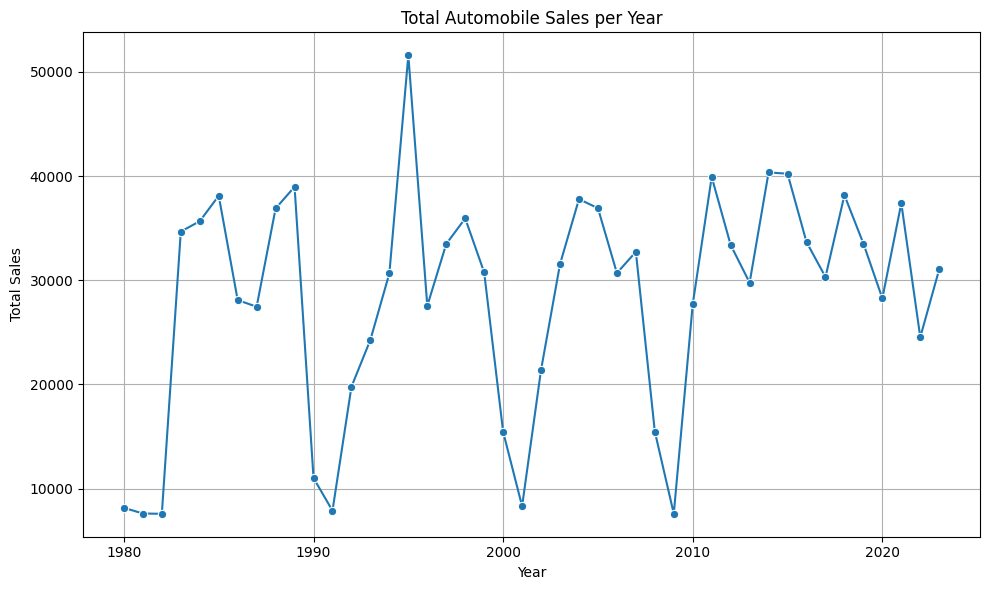

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/historical_automobile_sales.csv")

# Convert Year to datetime and extract only the year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['year_only'] = df['Year'].dt.year

# Q1: Line chart - total auto sales per year

plt.figure(figsize=(10, 6))
total_sales = df.groupby('year_only')['Automobile_Sales'].sum().reset_index()
sns.lineplot(data=total_sales, x='year_only', y='Automobile_Sales', marker='o')
plt.title("Total Automobile Sales per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

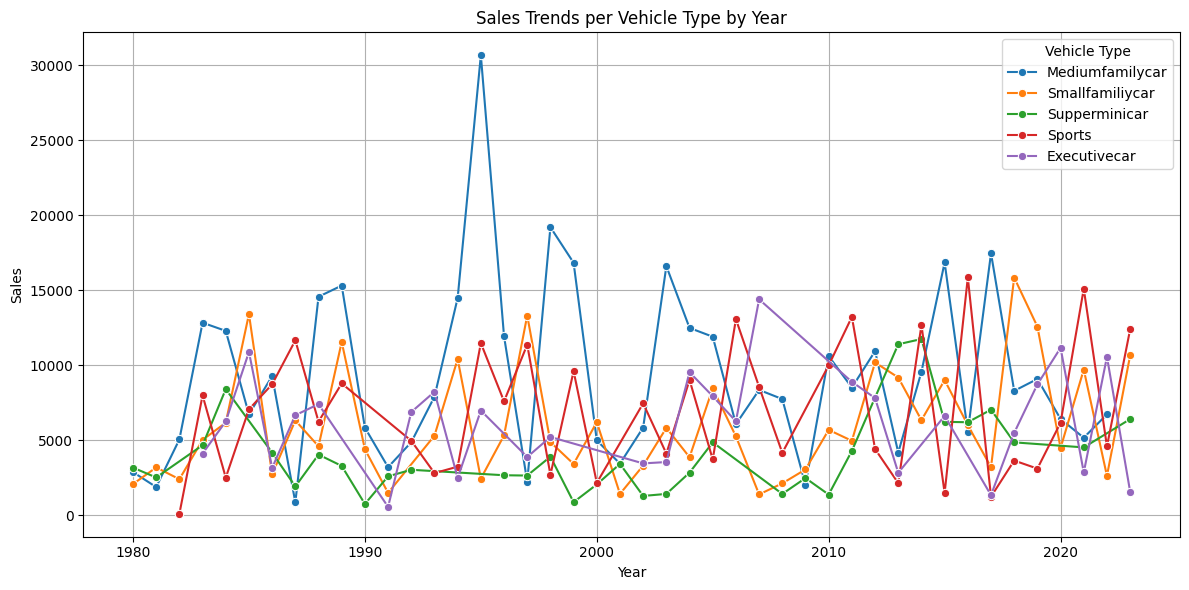

In [20]:
# Q2: Line chart per Vehicle Type to analyze trends

plt.figure(figsize=(12, 6))
sales_by_type = df.groupby(['year_only', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
sns.lineplot(data=sales_by_type, x='year_only', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title("Sales Trends per Vehicle Type by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.tight_layout()
plt.show()

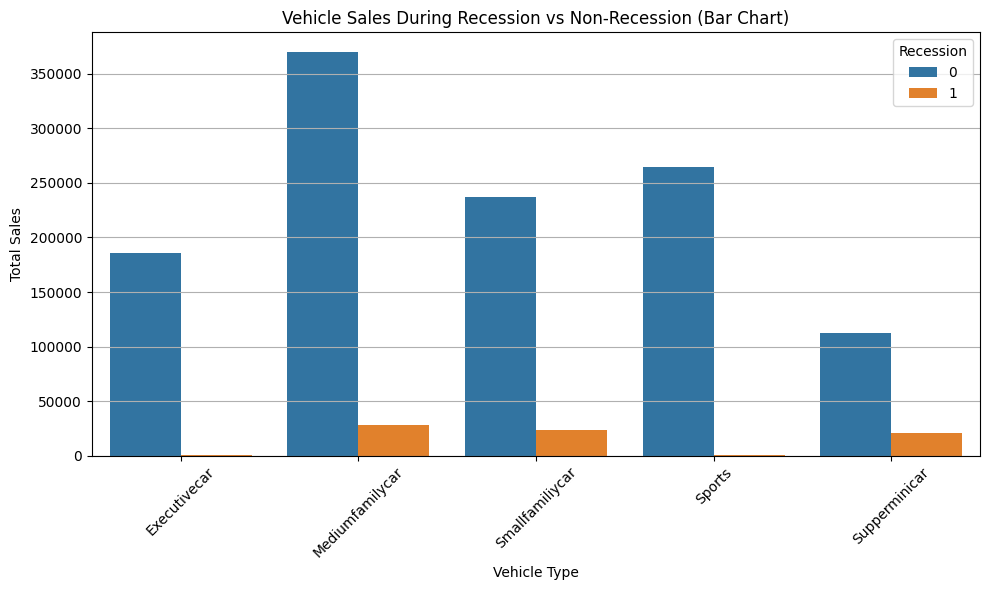

In [22]:
# Q3: Seaborn - compare sales trend in recession vs non-recession

plt.figure(figsize=(10, 6))
bar_data = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()
sns.barplot(data=bar_data, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.title("Vehicle Sales During Recession vs Non-Recession (Bar Chart)")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

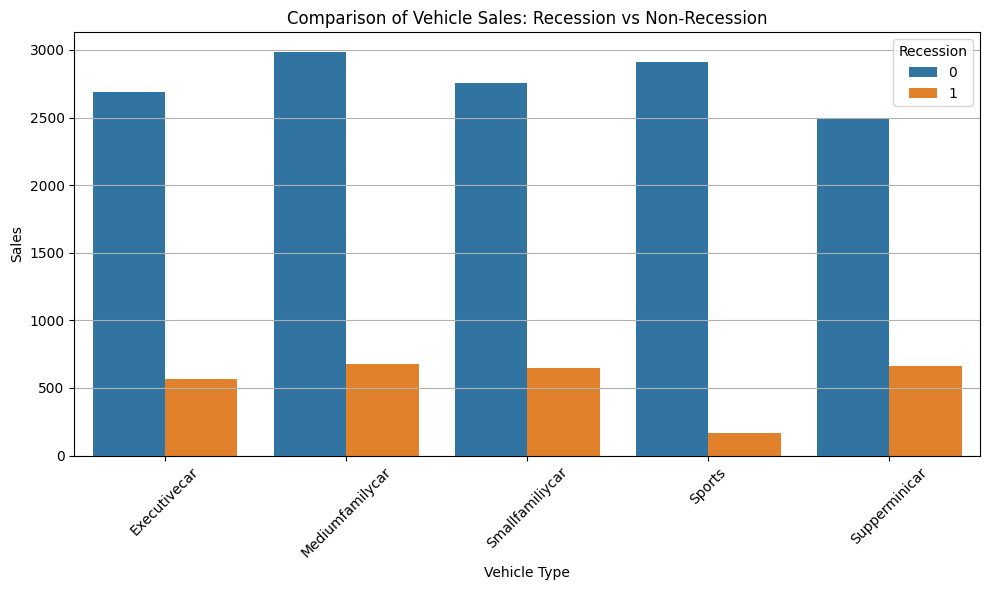

In [21]:
# Q4: Same as Q3 – compare total sales across periods per type

plt.figure(figsize=(10, 6))
sns.barplot(data=bar_data, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.title("Comparison of Vehicle Sales: Recession vs Non-Recession")
plt.xlabel("Vehicle Type")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()